# Examples from the paper

In this notebook, provide the codes used for illustration in the corresponding paper with all the supplementary code segments excluded from the paper due to space limitations.

In [1]:
import scipy
import sklearn
import keras
import imblearn

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import smote_variants as sv
import imblearn.datasets as imb_datasets
import sklearn.datasets as sk_datasets

random_seed= 3

Using TensorFlow backend.


In [2]:
# configuring pandas to print all columns

pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_columns', 10)
pd.set_option('max_colwidth', 1000)
pd.set_option('expand_frame_repr', False)

In [3]:
# printing package versions

print('numpy %s' % np.__version__)
print('imblearn %s' % imblearn.__version__)
print('scipy %s' % scipy.__version__)
print('sklearn %s' % sklearn.__version__)
print('keras %s' % keras.__version__)
print('smote_variants %s' % sv.__version__)

numpy 1.15.4
imblearn 0.4.3
scipy 1.1.0
sklearn 0.20.1
keras 2.2.4
smote_variants 0.2.6


In [4]:
# defining some plotting functions

def plot(X, y, title, min_label, maj_label, filename):
    plt.figure(figsize= (4, 3))
    plt.scatter(X[:,0][y == min_label], X[:,1][y == min_label], label='minority class', color='red', s=25)
    plt.scatter(X[:,0][y == maj_label], X[:,1][y == maj_label], label='majority class', color='black', marker='*', s=25)
    plt.xlabel('feature 0')
    plt.ylabel('feature 1')
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    
def plot_mc(X, y, title, label_0, label_1, label_2, filename):
    plt.figure(figsize= (4, 3))
    plt.scatter(X[:,0][y == label_0], X[:,1][y == label_0], label='class 0', color='red', s=25)
    plt.scatter(X[:,0][y == label_1], X[:,1][y == label_1], label='class 1', color='black', marker='*', s=25)
    plt.scatter(X[:,0][y == label_2], X[:,1][y == label_2], label='class 2', color='blue', marker='^', s=25)
    plt.xlabel('feature 0')
    plt.ylabel('feature 1')
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

In [5]:
# setting the random seed
np.random.seed(random_seed)

2019-06-15 17:58:57,220:INFO:OUPS: Running sampling via ('OUPS', "{'proportion': 1.0, 'n_jobs': 1}")


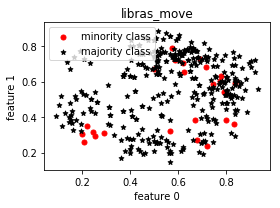

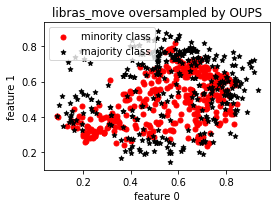

In [6]:
# sample code segment #0
# oversampling by OUPS and plotting

import smote_variants as sv
import imblearn.datasets as imb_datasets

libras= imb_datasets.fetch_datasets()['libras_move']

X, y= sv.OUPS().sample(libras['data'], libras['target'])

plot(libras['data'], libras['target'], 'libras_move', 1, -1, 'libras_move.eps')
plot(X, y, 'libras_move oversampled by OUPS', 1, -1, 'libras_move_oups.eps')


In [7]:
# setting the random seed
np.random.seed(random_seed)

In [8]:
# sample code segment #1
# evaluating the performance of k neighbors classifier with oversampling

from sklearn.neighbors import KNeighborsClassifier

results= sv.cross_validate(dataset= libras, sampler= sv.OUPS(), 
                           classifier= KNeighborsClassifier())

print(results.loc['auc'])

2019-06-15 17:58:57,916:INFO:The problem is binary
2019-06-15 17:58:57,926:INFO:Executing fold
2019-06-15 17:58:57,927:INFO:OUPS: Running sampling via ('OUPS', "{'proportion': 1.0, 'n_jobs': 1}")
2019-06-15 17:58:57,957:INFO:Executing fold
2019-06-15 17:58:57,958:INFO:OUPS: Running sampling via ('OUPS', "{'proportion': 1.0, 'n_jobs': 1}")
2019-06-15 17:58:57,987:INFO:Executing fold
2019-06-15 17:58:57,988:INFO:OUPS: Running sampling via ('OUPS', "{'proportion': 1.0, 'n_jobs': 1}")
2019-06-15 17:58:58,018:INFO:Executing fold
2019-06-15 17:58:58,019:INFO:OUPS: Running sampling via ('OUPS', "{'proportion': 1.0, 'n_jobs': 1}")
2019-06-15 17:58:58,049:INFO:Executing fold
2019-06-15 17:58:58,049:INFO:OUPS: Running sampling via ('OUPS', "{'proportion': 1.0, 'n_jobs': 1}")
2019-06-15 17:58:58,078:INFO:Executing fold
2019-06-15 17:58:58,079:INFO:OUPS: Running sampling via ('OUPS', "{'proportion': 1.0, 'n_jobs': 1}")
2019-06-15 17:58:58,107:INFO:Executing fold
2019-06-15 17:58:58,108:INFO:OUPS: 

value    0.97887
Name: auc, dtype: object


In [9]:
# evaluating the performance of k neighbors classifier without oversampling

np.random.seed(random_seed)
results_wo= sv.cross_validate(dataset= libras, sampler= sv.NoSMOTE(), 
                               classifier= KNeighborsClassifier())

2019-06-15 17:58:58,405:INFO:The problem is binary
2019-06-15 17:58:58,410:INFO:Executing fold
2019-06-15 17:58:58,411:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2019-06-15 17:58:58,421:INFO:Executing fold
2019-06-15 17:58:58,421:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2019-06-15 17:58:58,430:INFO:Executing fold
2019-06-15 17:58:58,430:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2019-06-15 17:58:58,440:INFO:Executing fold
2019-06-15 17:58:58,441:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2019-06-15 17:58:58,449:INFO:Executing fold
2019-06-15 17:58:58,450:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2019-06-15 17:58:58,460:INFO:Executing fold
2019-06-15 17:58:58,461:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2019-06-15 17:58:58,469:INFO:Executing fold
2019-06-15 17:58:58,470:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2019-06-15 17:58:58,478:INFO:Executing fold
2019-06-15 17:58:58,479:INFO:NoSMOTE: Running sampling via

In [10]:
# printing the results

print(results_wo.loc['auc'])

value    0.962839
Name: auc, dtype: object
